In [1]:
from google.colab import files
uploaded = files.upload()


Saving engine_data.csv to engine_data.csv


In [2]:
import pandas as pd

data = pd.read_csv('engine_data.csv')
data.head()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
data.describe()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [5]:
data.isnull().sum()


,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


In [6]:
data.head()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [7]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


In [8]:
data = data.dropna()


In [10]:
data = data.drop_duplicates()


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(data[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure',
                                             'coolant_pressure', 'lub_oil_temp', 'coolant_temp']])

scaled_data = pd.DataFrame(scaled_features, columns=['engine_rpm', 'lub_oil_pressure', 'fuel_pressure',
                                                     'coolant_pressure', 'lub_oil_temp', 'coolant_temp'])

data[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp']] = scaled_data


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(data[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure',
                                             'coolant_pressure', 'lub_oil_temp', 'coolant_temp']])

data[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp']] = scaled_features


In [13]:
from sklearn.model_selection import train_test_split

X = data[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp']]
y = data['engine_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (15628, 6)
Testing set size: (3907, 6)


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6365497824417712

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.38      0.44      1459
           1       0.68      0.79      0.73      2448

    accuracy                           0.64      3907
   macro avg       0.60      0.58      0.58      3907
weighted avg       0.62      0.64      0.62      3907


Confusion Matrix:
 [[ 553  906]
 [ 514 1934]]


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


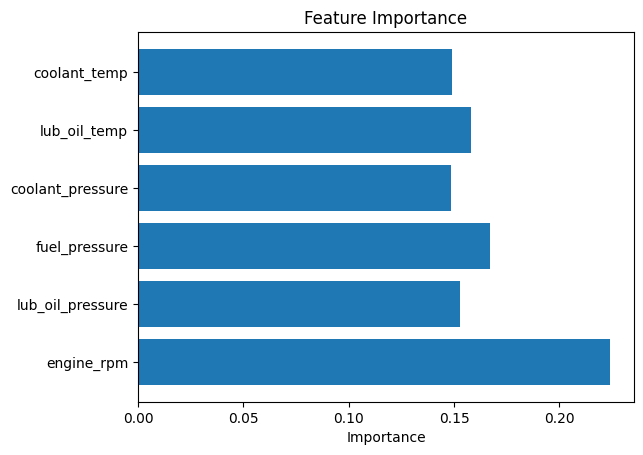

In [18]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [19]:
import joblib

joblib.dump(model, 'engine_condition_model.pkl')


['engine_condition_model.pkl']